<a href="https://colab.research.google.com/github/jessc0202/Sizhe_Chen_mini_Project_9/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

drink_csv = "https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/alcohol-consumption/drinks.csv"
drink_df = pd.read_csv(drink_csv)
print(drink_df.info())
print(drink_df.isnull().sum())  # Check for missing values
print(drink_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB
None
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64
       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25         

**Clean Dataset**

In [14]:
drink_df = drink_df.rename(
    columns={
        "beer_servings": "beer",
        "spirit_servings": "spirits",
        "wine_servings": "wine",
        "total_litres_of_pure_alcohol": "total_alcohol",
    }
)

**data analysis**

In [15]:
# Calculate basic statistics
basic_stats = drink_df[["beer", "spirits", "wine", "total_alcohol"]].describe()
print(basic_stats)

             beer     spirits        wine  total_alcohol
count  193.000000  193.000000  193.000000     193.000000
mean   106.160622   80.994819   49.450777       4.717098
std    101.143103   88.284312   79.697598       3.773298
min      0.000000    0.000000    0.000000       0.000000
25%     20.000000    4.000000    1.000000       1.300000
50%     76.000000   56.000000    8.000000       4.200000
75%    188.000000  128.000000   59.000000       7.200000
max    376.000000  438.000000  370.000000      14.400000


In [16]:
# Top 5 countries by total alcohol consumption
top_5_alcohol = drink_df.nlargest(5, "total_alcohol")[["country", "total_alcohol"]]
print(top_5_alcohol)

           country  total_alcohol
15         Belarus           14.4
98       Lithuania           12.9
3          Andorra           12.4
68         Grenada           11.9
45  Czech Republic           11.8


In [17]:
# Correlation matrix
correlation_matrix = drink_df[["beer", "spirits", "wine", "total_alcohol"]].corr()
print(correlation_matrix)

                   beer   spirits      wine  total_alcohol
beer           1.000000  0.458819  0.527172       0.835839
spirits        0.458819  1.000000  0.194797       0.654968
wine           0.527172  0.194797  1.000000       0.667598
total_alcohol  0.835839  0.654968  0.667598       1.000000


**Visualization**

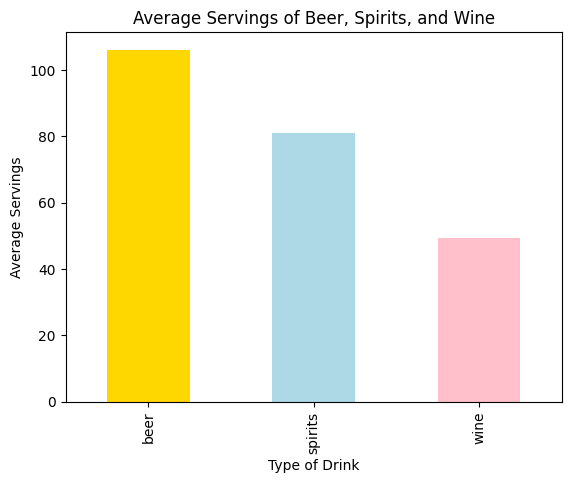

In [18]:
# Average servings bar plot
avg_servings = drink_df[["beer", "spirits", "wine"]].mean()
avg_servings.plot(kind="bar", color=["gold", "lightblue", "pink"])
plt.title("Average Servings of Beer, Spirits, and Wine")
plt.xlabel("Type of Drink")
plt.ylabel("Average Servings")
plt.show()

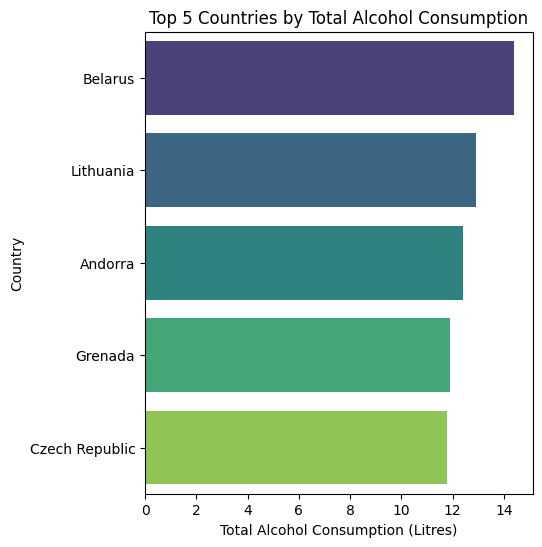

In [25]:
# Top 5 countries by total alcohol consumption
top_5 = drink_df.nlargest(5, "total_alcohol")
plt.figure(figsize=(5, 6))
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    sns.barplot(
        data=top_5,
        x="total_alcohol",
        y="country",
        palette="viridis",
        hue=None,
        legend=False,
    )
    plt.title("Top 5 Countries by Total Alcohol Consumption")
    plt.xlabel("Total Alcohol Consumption (Litres)")
    plt.ylabel("Country")
    plt.show()

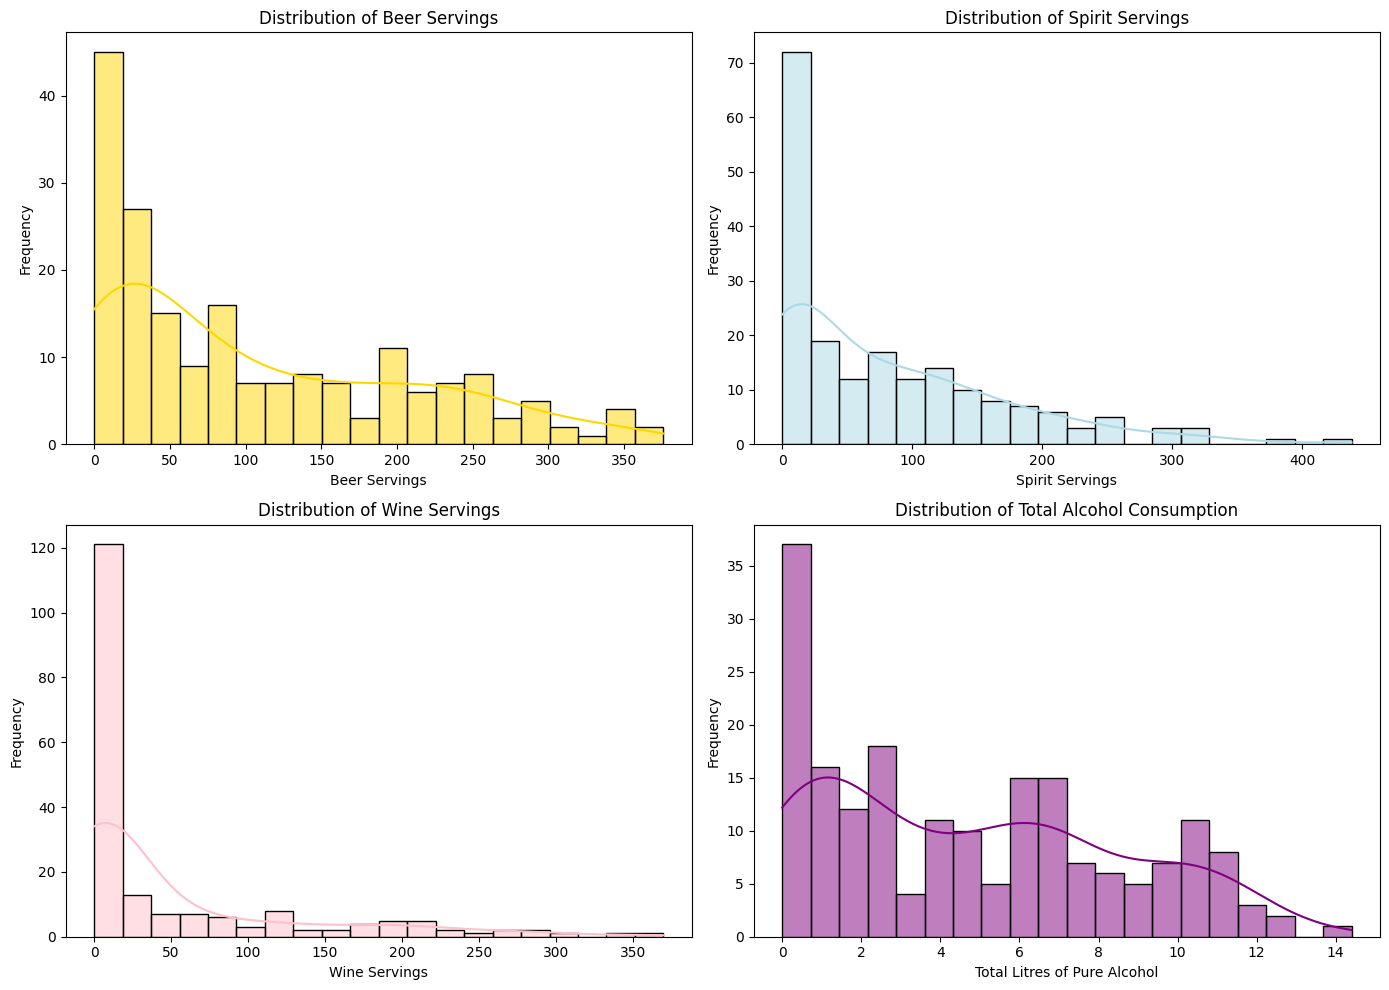

In [20]:
# Set up the figure for multiple plots
plt.figure(figsize=(14, 10))

# Plot distribution of beer servings
plt.subplot(2, 2, 1)
sns.histplot(drink_df["beer"], kde=True, color="gold", bins=20)
plt.title("Distribution of Beer Servings")
plt.xlabel("Beer Servings")
plt.ylabel("Frequency")

# Plot distribution of spirit servings
plt.subplot(2, 2, 2)
sns.histplot(drink_df["spirits"], kde=True, color="lightblue", bins=20)
plt.title("Distribution of Spirit Servings")
plt.xlabel("Spirit Servings")
plt.ylabel("Frequency")

# Plot distribution of wine servings
plt.subplot(2, 2, 3)
sns.histplot(drink_df["wine"], kde=True, color="pink", bins=20)
plt.title("Distribution of Wine Servings")
plt.xlabel("Wine Servings")
plt.ylabel("Frequency")

# Plot distribution of total alcohol consumption
plt.subplot(2, 2, 4)
sns.histplot(drink_df["total_alcohol"], kde=True, color="purple", bins=20)
plt.title("Distribution of Total Alcohol Consumption")
plt.xlabel("Total Litres of Pure Alcohol")
plt.ylabel("Frequency")

# Display the plots
plt.tight_layout()
plt.show()

**Data Manipulation**

In [21]:
# Create a new column for total servings (sum of beer, spirits, and wine)
drink_df["total_servings"] = drink_df["beer"] + drink_df["spirits"] + drink_df["wine"]
print(drink_df[["country", "beer", "spirits", "wine", "total_servings"]].head())


# Classify countries based on total alcohol consumption
# Low: <3 litres, Moderate: 3-6 litres, High: >6 litres
def classify_consumption(total_alcohol):
    if total_alcohol < 3:
        return "Low"
    elif total_alcohol <= 6:
        return "Moderate"
    else:
        return "High"


drink_df["consumption_category"] = drink_df["total_alcohol"].apply(classify_consumption)
print(drink_df[["country", "total_alcohol", "consumption_category"]].head())

# The average servings for beer, spirits, wine, and total_alcohol
average_servings = drink_df[["beer", "spirits", "wine", "total_alcohol"]].mean()
print("Average Servings:\n", average_servings)

# Identify countries with zero alcohol consumption
zero_consumption_countries = drink_df[drink_df["total_alcohol"] == 0][
    ["country", "total_alcohol"]
]
print("Countries with Zero Alcohol Consumption:\n", zero_consumption_countries)

       country  beer  spirits  wine  total_servings
0  Afghanistan     0        0     0               0
1      Albania    89      132    54             275
2      Algeria    25        0    14              39
3      Andorra   245      138   312             695
4       Angola   217       57    45             319
       country  total_alcohol consumption_category
0  Afghanistan            0.0                  Low
1      Albania            4.9             Moderate
2      Algeria            0.7                  Low
3      Andorra           12.4                 High
4       Angola            5.9             Moderate
Average Servings:
 beer             106.160622
spirits           80.994819
wine              49.450777
total_alcohol      4.717098
dtype: float64
Countries with Zero Alcohol Consumption:
               country  total_alcohol
0         Afghanistan            0.0
13         Bangladesh            0.0
46        North Korea            0.0
79               Iran            0.0
90       

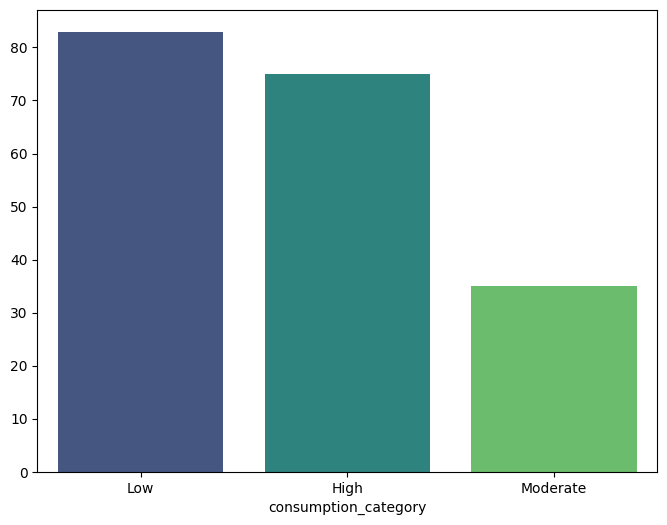

In [24]:
category_counts = drink_df["consumption_category"].value_counts()

# Plot the distribution of alcohol consumption by category
plt.figure(figsize=(8, 6))
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    sns.barplot(
        x=category_counts.index,
        y=category_counts.values,
        palette="viridis",
        hue=None,
        legend=False,
    )